<h3>Regularised regression</h3>
<p>Our original squared loss function in matrix/vector notation is:
$$ L = \frac{1}{N}\sum_{n=1}^N (\mathbf{t} - \mathbf{X}\mathbf{w})^T(\mathbf{t} - \mathbf{X}\mathbf{w}) $$
Here's another loss function:
$$ L = \lambda \mathbf{w}^T\mathbf{w} + \frac{1}{N}\sum_{n=1}^N (\mathbf{t} - \mathbf{X}\mathbf{w})^T(\mathbf{t} - \mathbf{X}\mathbf{w}) $$
Recall that we're minimising this function and so (if $\lambda>0$) this additional term will penalise large positive and negative values in $\mathbf{w}$. $\lambda$ controls how much influence this new term has over the original squared error term.</p>

<p>Differentiating this with respect to $\mathbf{w}$ and then setting to zero (this is a good exercise to do) results in:
$$ (\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I})\mathbf{w} = \mathbf{X}^T\mathbf{t} $$
where $\mathbf{I}$ is a square matrix with ones on the diagonal and zeros elsewhere (the identity matrix).</p>

<p>To demonstrate the effect of this additional term, we will generate some synthetic data by using a quadratic function and assing some random (normal / Gaussian) noise.</p>

(1119,)
(1119, 12)
lampda 0 Mean Square Error = 0.410941504859
lampda 0.01 Mean Square Error = 0.410812170168
lampda 0.05 Mean Square Error = 0.410273985717
lampda 0.1 Mean Square Error = 0.409691210184
lampda 0.5 Mean Square Error = 0.407334136396
lampda 1 Mean Square Error = 0.406710401547
lampda 3 Mean Square Error = 0.40751314553
lampda 5 Mean Square Error = 0.408391001457
lampda 10 Mean Square Error = 0.410138612209
lampda 20 Mean Square Error = 0.413464967829
lampda 25 Mean Square Error = 0.415074761429


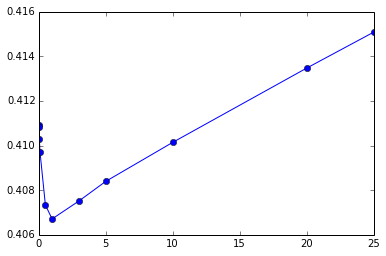

In [39]:
import urllib
urllib.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', 'winequality-red.csv')
import numpy as np
with open('winequality-red.csv') as f:
    lines = (line for line in f)
    data = np.loadtxt(lines, delimiter=';', skiprows=1)
%matplotlib inline
import pylab as plt
    
N = data.shape[0] #get tupple (numRows, numCols)
np.random.shuffle(data)

train = data[:int(N*0.7)]
test = data[int(N*0.7):]
X_train = train[:,:11]
X_train = np.c_[np.ones(train.shape[0]), X_train] # append 1s as first column
q_train = train[:,11]
print q_train.shape
print X_train.shape

X_test = test[:,:11]
X_test = np.c_[np.ones(test.shape[0]), X_test]
q_test = test[:,11]

lambs = [0,0.01,0.05,0.1,0.5,1,3,5,10,20,25]
errors = []
for lamb in lambs:
    w = np.linalg.solve(np.dot(X_train.T,X_train) + lamb*np.identity(12),np.dot(X_train.T,q_train))
    f_test = np.dot(X_test,w)
    meanSquareError = ((q_test-f_test)**2).mean()
    errors += [meanSquareError]
    print "lampda", lamb, "Mean Square Error =", meanSquareError
    #plt.figure()
    #plt.scatter(f_test,q_test, color='blue')
    
plt.plot(lambs, errors, '-o')
plt.show()


<p>As $\lambda$ increases, high values in $\mathbf{w}$ are more heavily penalised which leads to *simpler* functions. Why do lower values correspond to simpler functions?</p>
<p>Firstly, what does *simpler* mean?</p>
<p>I would argue that simpler functions have smaller derivatives (first, second, etc) as they typically change more slowly. In our polynomials, the derivatives are dependent on the values of $\mathbf{w}$. In particular our polynomial is:
$$ t = \sum_{d=0}^D w_d x^d $$
and the first derivative is:
$$ \frac{dt}{dx} = \sum_{d=1}^D dw_d x^{d-1} $$
and second is:
$$ \frac{d^2t}{dx^2} = \sum_{d=2}^D d(d-1)w_d x^{d-2} $$
which in both cases increases with increasing values of $w_d$. So penalising high (positive and negative) values decreases (in general) the gradients (and gradients of gradients, etc).</p> 

[[ 111.  111.  111.  111.  111.  111.  111.  111.  111.  111.]]
[    0.   120.   240.   360.   480.   600.   720.   840.   960.  1080.
  1200.]
X_fold [[  1.    10.3    0.53 ...,   3.12   0.59   9.3 ]
 [  1.     7.9    0.6  ...,   3.3    0.46   9.4 ]
 [  1.     7.6    0.41 ...,   3.32   0.57  10.5 ]
 ..., 
 [  1.     7.3    0.58 ...,   3.46   0.59  10.2 ]
 [  1.     7.5    0.63 ...,   3.26   0.77   9.4 ]
 [  1.     9.5    0.59 ...,   3.46   0.63   9.5 ]]
X_train [[  1.      9.2     0.755 ...,   2.87    1.36   10.2  ]
 [  1.      5.1     0.47  ...,   3.9     0.62   12.8  ]
 [  1.     12.5     0.38  ...,   3.1     0.73   10.5  ]
 ..., 
 [  1.      7.3     0.59  ...,   3.37    0.49    9.4  ]
 [  1.      9.3     0.48  ...,   3.22    0.72   11.2  ]
 [  1.      7.      0.805 ...,   3.48    0.56    9.6  ]]
[ 0.40185978  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
X_fold [[  1.      9.2     0.755 ...,   2.87    1.36   10.2  ]
 [  1.     

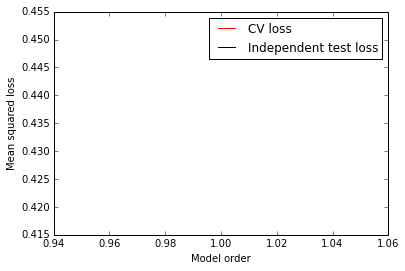

In [44]:
N = train.shape[0]
K = 10
sizes = np.tile(np.floor(N/10),(1,K))
print sizes
sizes[-1] = sizes[-1] + N - sizes.sum()
c_sizes = np.hstack((0,np.cumsum(sizes)))
print c_sizes
X = np.copy(train[:,:11])
X = np.c_[np.ones(train.shape[0]), X]
t = np.copy(train[:,11])
X_test = np.copy(test[:,:11])
X_test = np.c_[np.ones(test.shape[0]), X_test]
t_test = np.copy(test[:,11])
cv_loss = np.zeros(K)
ind_loss = np.zeros(K)
train_loss = np.zeros(K)

for fold in range(K):
    X_fold = X[c_sizes[fold]:c_sizes[fold+1],:]
    X_train = np.delete(X,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)
    print "X_fold", X_fold
    print "X_train", X_train
    t_fold = t[c_sizes[fold]:c_sizes[fold+1]]
    t_train = np.delete(t,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)
    
    w = np.linalg.solve(np.dot(X_train.T,X_train) + lamb*np.identity(12),np.dot(X_train.T,t_train))
    #print w
    fold_pred = np.dot(X_fold,w)
    cv_loss[fold] = ((fold_pred - t_fold)**2).mean()
    ind_pred = np.dot(X_test,w)
    ind_loss[fold] = ((ind_pred - t_test)**2).mean()
    train_pred = np.dot(X_train,w)
    train_loss[fold] = ((train_pred - t_train)**2).mean()
    print cv_loss

print train_loss.mean(axis=0)
print cv_loss.mean(axis=0)
print ind_loss.mean(axis=0)
plt.plot([1],cv_loss.mean(axis=0),'r-',label="CV loss")
plt.plot([1],ind_loss.mean(axis=0),'k',label="Independent test loss")
plt.legend()
plt.xlabel('Model order')
plt.ylabel('Mean squared loss')